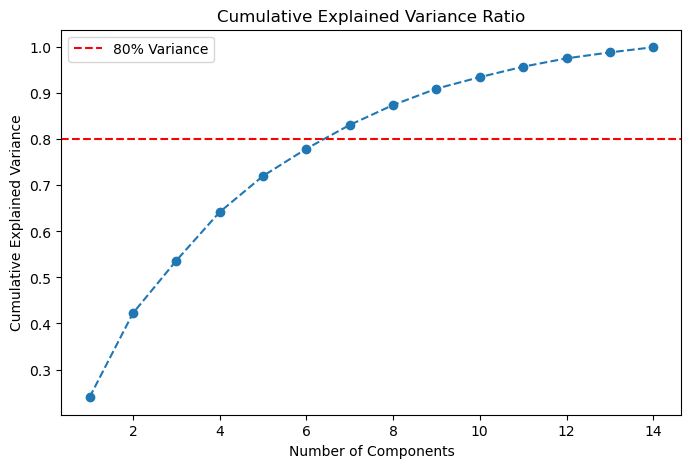

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from joblib import Parallel, delayed
from sklearn.metrics import silhouette_score

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/feature_selected_data.csv')
data = data.select_dtypes(include=[np.number]).dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# PCA with more components
pca = PCA(n_components=scaled_data.shape[1])  # Use all components available
pca.fit(scaled_data)

# Calculate the cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance to see how many components explain > 80%
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance')
plt.title("Cumulative Explained Variance Ratio")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.show()


In [3]:

# Decide how many components to retain based on cumulative variance ratio > 80%
n_components_needed = np.argmax(cumulative_variance_ratio >= 0.80) + 2
print(f"Number of components needed to explain > 80% variance: {n_components_needed}")

# Refit PCA with the selected number of components
pca = PCA(n_components=n_components_needed)
reduced_data = pca.fit_transform(scaled_data)

# Print the explained variance ratio after refitting
print(f"Explained Variance Ratio after reducing components to {n_components_needed}: {pca.explained_variance_ratio_}")
print(f"Cumulative Explained Variance after reducing components: {np.cumsum(pca.explained_variance_ratio_)}")

#Taking All components

# Refit PCA with the selected number of components
pca = PCA(n_components=scaled_data.shape[1])
reduced_data = pca.fit_transform(scaled_data)

# Print the explained variance ratio after refitting
print(f"Explained Variance Ratio after reducing components to {n_components_needed}: {pca.explained_variance_ratio_}")
print(f"Cumulative Explained Variance after reducing components: {np.cumsum(pca.explained_variance_ratio_)}")


Number of components needed to explain > 80% variance: 8
Explained Variance Ratio after reducing components to 8: [0.23989488 0.18242353 0.11430148 0.10536223 0.0783315  0.05922881
 0.05164438 0.04326517]
Cumulative Explained Variance after reducing components: [0.23989488 0.42231841 0.53661988 0.64198212 0.72031362 0.77954244
 0.83118682 0.87445199]
Explained Variance Ratio after reducing components to 8: [0.23989488 0.18242353 0.11430148 0.10536223 0.0783315  0.05922881
 0.05164438 0.04326517 0.03554041 0.0250875  0.02264862 0.0181092
 0.0129113  0.01125099]
Cumulative Explained Variance after reducing components: [0.23989488 0.42231841 0.53661988 0.64198212 0.72031362 0.77954244
 0.83118682 0.87445199 0.9099924  0.9350799  0.95772851 0.97583771
 0.98874901 1.        ]


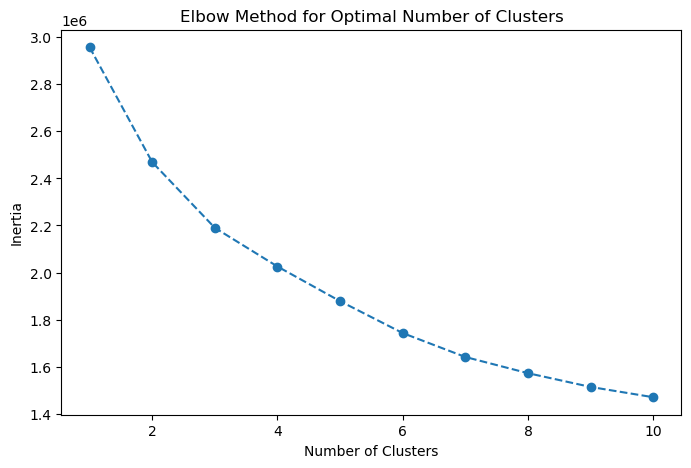

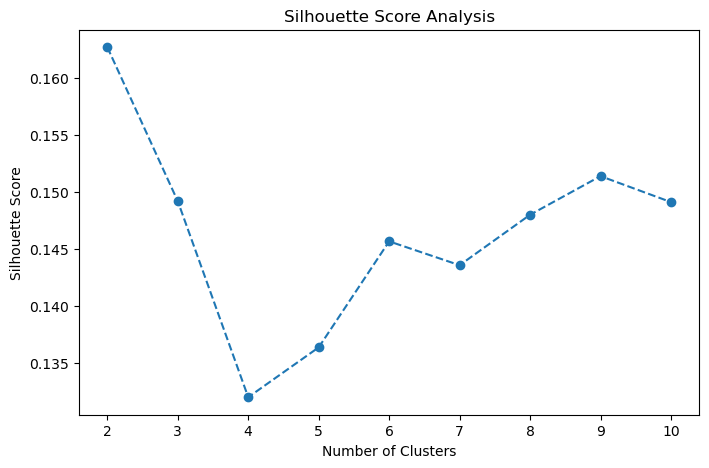

In [6]:

# Elbow Method for Optimal Number of Clusters
def elbow_method(data, max_clusters=10):
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o', linestyle='--')
    plt.title("Elbow Method for Optimal Number of Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.show()

# Function to calculate silhouette score for a given k
def calculate_silhouette_for_k(k, data):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)
    return silhouette_score(data, labels)


# Silhouette Score Analysis for Optimal Number of Clusters
def silhouette_analysis(data, max_clusters=10):
    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
    plt.title("Silhouette Score Analysis")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.show()

# Perform Elbow Method Analysis
elbow_method(reduced_data, max_clusters=10)


# Parallel computation for silhouette score for different cluster counts
silhouette_scores = Parallel(n_jobs=-1)(delayed(calculate_silhouette_for_k)(k, reduced_data) for k in range(2, 11))

# Plotting silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title("Silhouette Score Analysis")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [4]:

# Decide how many components to retain based on cumulative variance ratio > 80%
n_components_needed = np.argmax(cumulative_variance_ratio >= 0.80) + 2
print(f"Number of components needed to explain > 80% variance: {n_components_needed}")

# Refit PCA with the selected number of components
pca = PCA(n_components=n_components_needed)
reduced_data = pca.fit_transform(scaled_data)

# Print the explained variance ratio after refitting
print(f"Explained Variance Ratio after reducing components to {n_components_needed}: {pca.explained_variance_ratio_}")
print(f"Cumulative Explained Variance after reducing components: {np.cumsum(pca.explained_variance_ratio_)}")


Number of components needed to explain > 80% variance: 8
Explained Variance Ratio after reducing components to 8: [0.23989488 0.18242353 0.11430148 0.10536223 0.0783315  0.05922881
 0.05164438 0.04326517]
Cumulative Explained Variance after reducing components: [0.23989488 0.42231841 0.53661988 0.64198212 0.72031362 0.77954244
 0.83118682 0.87445199]


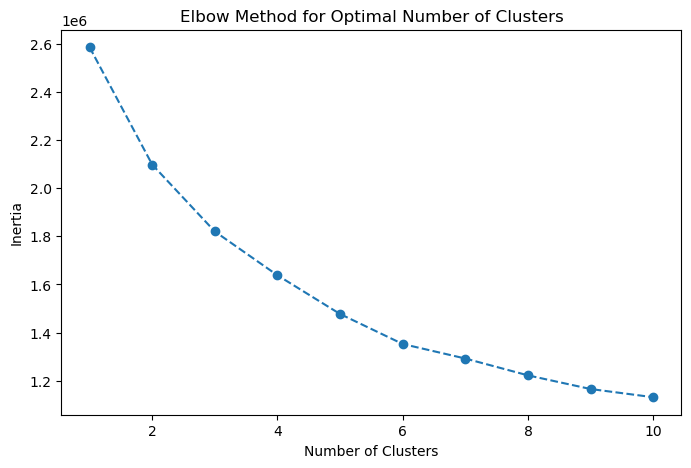

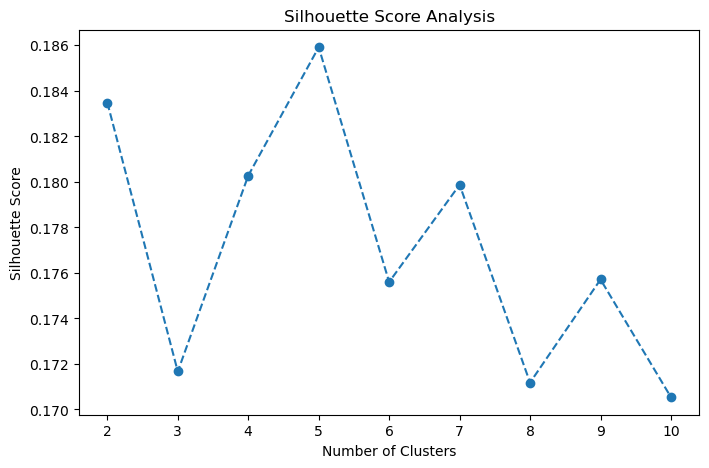

In [10]:

# Elbow Method for Optimal Number of Clusters
def elbow_method(data, max_clusters=10):
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o', linestyle='--')
    plt.title("Elbow Method for Optimal Number of Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.show()

# Function to calculate silhouette score for a given k
def calculate_silhouette_for_k(k, data):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)
    return silhouette_score(data, labels)


# Silhouette Score Analysis for Optimal Number of Clusters
def silhouette_analysis(data, max_clusters=10):
    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
    plt.title("Silhouette Score Analysis")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.show()

# Perform Elbow Method Analysis
elbow_method(reduced_data, max_clusters=10)


# Parallel computation for silhouette score for different cluster counts
silhouette_scores = Parallel(n_jobs=-1)(delayed(calculate_silhouette_for_k)(k, reduced_data) for k in range(2, 11))

# Plotting silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title("Silhouette Score Analysis")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

Optimal Silhouette Score: 0.1988438986852906


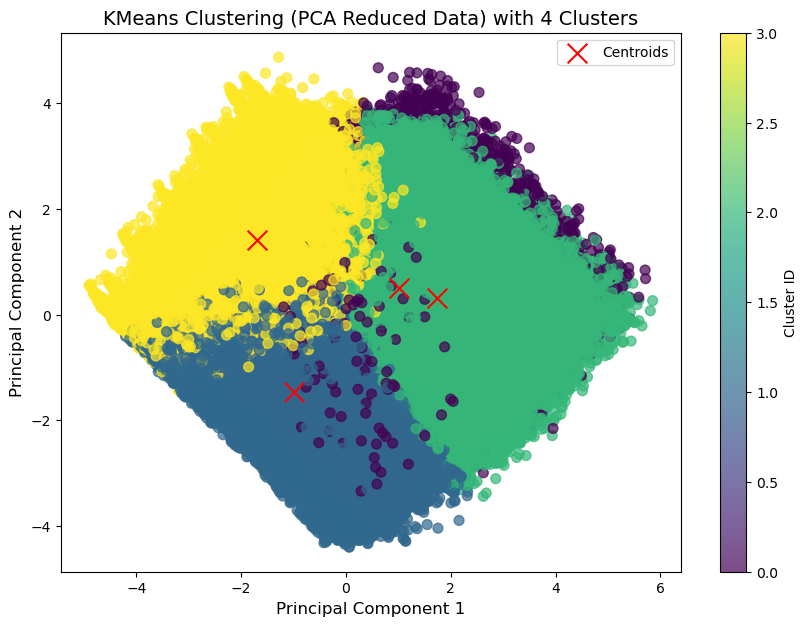

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from joblib import Parallel, delayed



# Perform KMeans clustering with 4 clusters (without n_jobs in KMeans)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10, algorithm='elkan')  # Removed n_jobs
kmeans_labels = kmeans.fit_predict(reduced_data)

# Calculate silhouette score using parallelization
def calculate_silhouette(k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, algorithm='elkan')
    labels = kmeans.fit_predict(reduced_data)
    return silhouette_score(reduced_data, labels)

# Silhouette score parallel computation for cluster sizes 2 to 10
silhouette_scores = Parallel(n_jobs=-1)(delayed(calculate_silhouette)(k) for k in range(2, 11))
optimal_silhouette_score = max(silhouette_scores)
print(f"Optimal Silhouette Score: {optimal_silhouette_score}")

# Plot the clusters with clear demarcation
plt.figure(figsize=(10, 7))

# Scatter plot with different colors for each cluster
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)

# Plot cluster centers
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')

# Set plot title and labels
plt.title(f"KMeans Clustering (PCA Reduced Data) with {optimal_clusters} Clusters", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.colorbar(scatter, label='Cluster ID')
plt.legend()

# Show the plot
plt.show()

Optimal Silhouette Score: 0.1988438986852906


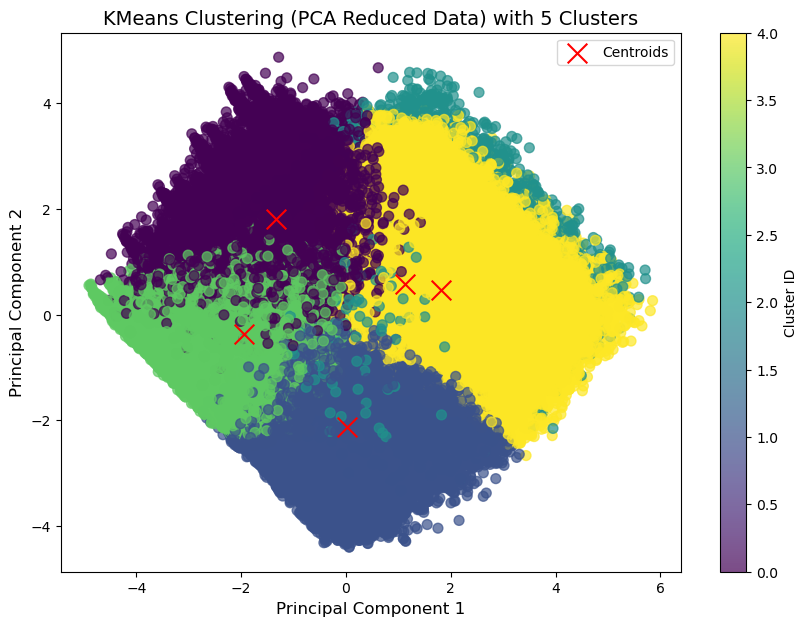

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from joblib import Parallel, delayed



# Perform KMeans clustering with 4 clusters (without n_jobs in KMeans)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10, algorithm='elkan')  # Removed n_jobs
kmeans_labels = kmeans.fit_predict(reduced_data)

# Calculate silhouette score using parallelization
def calculate_silhouette(k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, algorithm='elkan')
    labels = kmeans.fit_predict(reduced_data)
    return silhouette_score(reduced_data, labels)

# Silhouette score parallel computation for cluster sizes 2 to 10
silhouette_scores = Parallel(n_jobs=-1)(delayed(calculate_silhouette)(k) for k in range(2, 11))
optimal_silhouette_score = max(silhouette_scores)
print(f"Optimal Silhouette Score: {optimal_silhouette_score}")

# Plot the clusters with clear demarcation
plt.figure(figsize=(10, 7))

# Scatter plot with different colors for each cluster
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)

# Plot cluster centers
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')

# Set plot title and labels
plt.title(f"KMeans Clustering (PCA Reduced Data) with {optimal_clusters} Clusters", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.colorbar(scatter, label='Cluster ID')
plt.legend()

# Show the plot
plt.show()

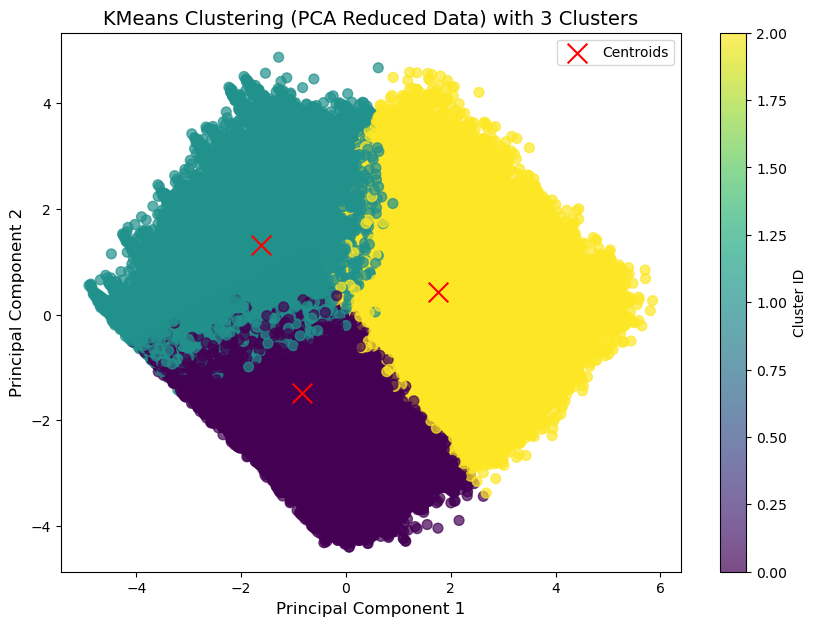

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from joblib import Parallel, delayed



# Perform KMeans clustering with 4 clusters (without n_jobs in KMeans)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10, algorithm='elkan')  # Removed n_jobs
kmeans_labels = kmeans.fit_predict(reduced_data)


# Plot the clusters with clear demarcation
plt.figure(figsize=(10, 7))

# Scatter plot with different colors for each cluster
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)

# Plot cluster centers
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')

# Set plot title and labels
plt.title(f"KMeans Clustering (PCA Reduced Data) with {optimal_clusters} Clusters", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.colorbar(scatter, label='Cluster ID')
plt.legend()

# Show the plot
plt.show()

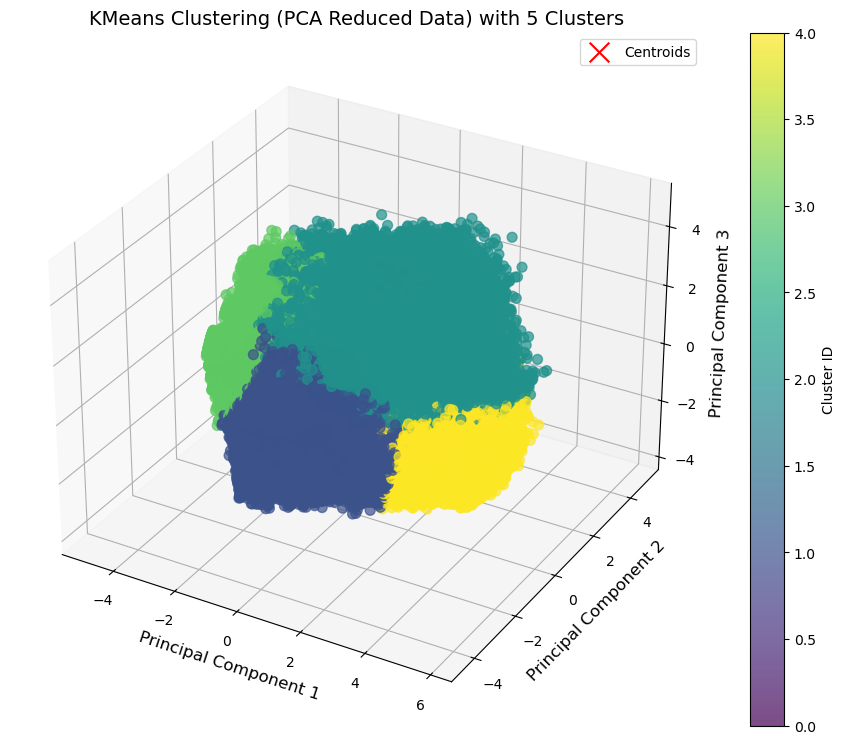

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from joblib import Parallel, delayed
from mpl_toolkits.mplot3d import Axes3D

# Perform KMeans clustering with 4 clusters (without n_jobs in KMeans)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10, algorithm='elkan')  # Removed n_jobs
kmeans_labels = kmeans.fit_predict(reduced_data)

# Plot the clusters in 3D with centroids
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors for each cluster
scatter = ax.scatter(
    reduced_data[:, 0], 
    reduced_data[:, 1], 
    reduced_data[:, 2], 
    c=kmeans_labels, 
    cmap='viridis', 
    s=50, 
    alpha=0.7
)

# Plot cluster centers
centroids = kmeans.cluster_centers_
ax.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    centroids[:, 2], 
    c='red', 
    s=200, 
    marker='x', 
    label='Centroids'
)

# Set plot title and labels
ax.set_title(f"KMeans Clustering (PCA Reduced Data) with {optimal_clusters} Clusters", fontsize=14)
ax.set_xlabel("Principal Component 1", fontsize=12)
ax.set_ylabel("Principal Component 2", fontsize=12)
ax.set_zlabel("Principal Component 3", fontsize=12)
ax.legend()

# Show color bar
plt.colorbar(scatter, label='Cluster ID')

# Show the plot
plt.show()

Unique cluster labels: [0 1 2 3 4]
Cluster counts:
 4    52334
3    47636
1    41520
2    36967
0    32775
Name: count, dtype: int64


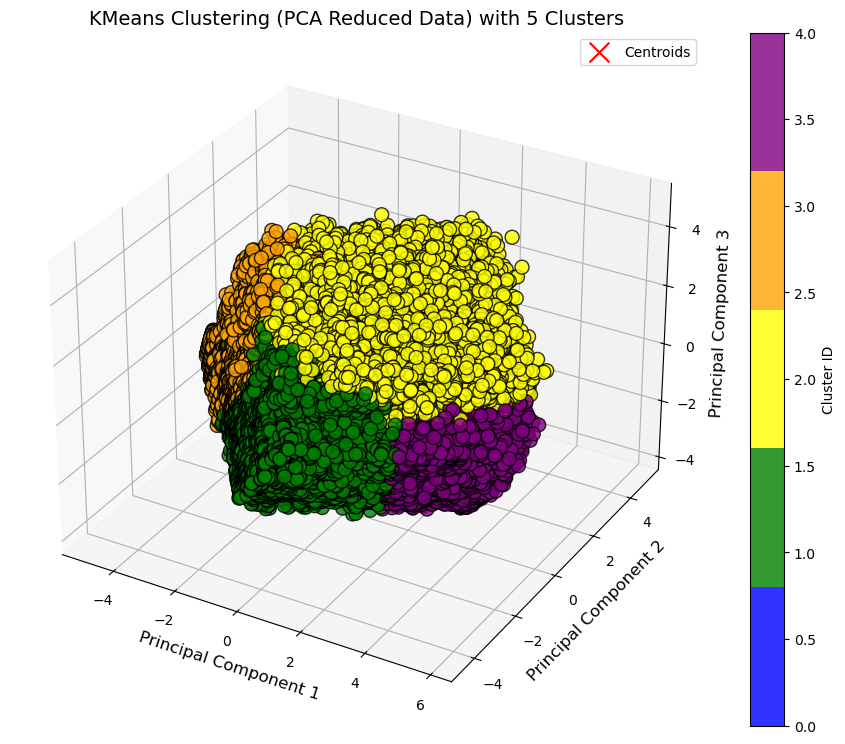

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Assume 'reduced_data' is PCA-reduced to 3 components
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10, algorithm='elkan')
kmeans_labels = kmeans.fit_predict(reduced_data)

# Print unique cluster labels and counts
print("Unique cluster labels:", np.unique(kmeans_labels))
print("Cluster counts:\n", pd.Series(kmeans_labels).value_counts())

# Plot the clusters in 3D with centroids
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Use a custom colormap for better distinction
cmap = ListedColormap(['blue', 'green', 'yellow', 'orange', 'purple'])

# Scatter plot with improved visualization
scatter = ax.scatter(
    reduced_data[:, 0], 
    reduced_data[:, 1], 
    reduced_data[:, 2], 
    c=kmeans_labels, 
    cmap=cmap, 
    s=100,  # Increase point size
    alpha=0.8,
    edgecolor='k'  # Add a border for better visibility
)

# Plot cluster centers
centroids = np.array([reduced_data[kmeans_labels == i].mean(axis=0) for i in range(optimal_clusters)])
ax.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    centroids[:, 2], 
    c='red', 
    s=200, 
    marker='x', 
    label='Centroids'
)

# Set plot title and labels
ax.set_title(f"KMeans Clustering (PCA Reduced Data) with {optimal_clusters} Clusters", fontsize=14)
ax.set_xlabel("Principal Component 1", fontsize=12)
ax.set_ylabel("Principal Component 2", fontsize=12)
ax.set_zlabel("Principal Component 3", fontsize=12)
ax.legend()

# Show color bar
plt.colorbar(scatter, label='Cluster ID')

# Show the plot
plt.show()

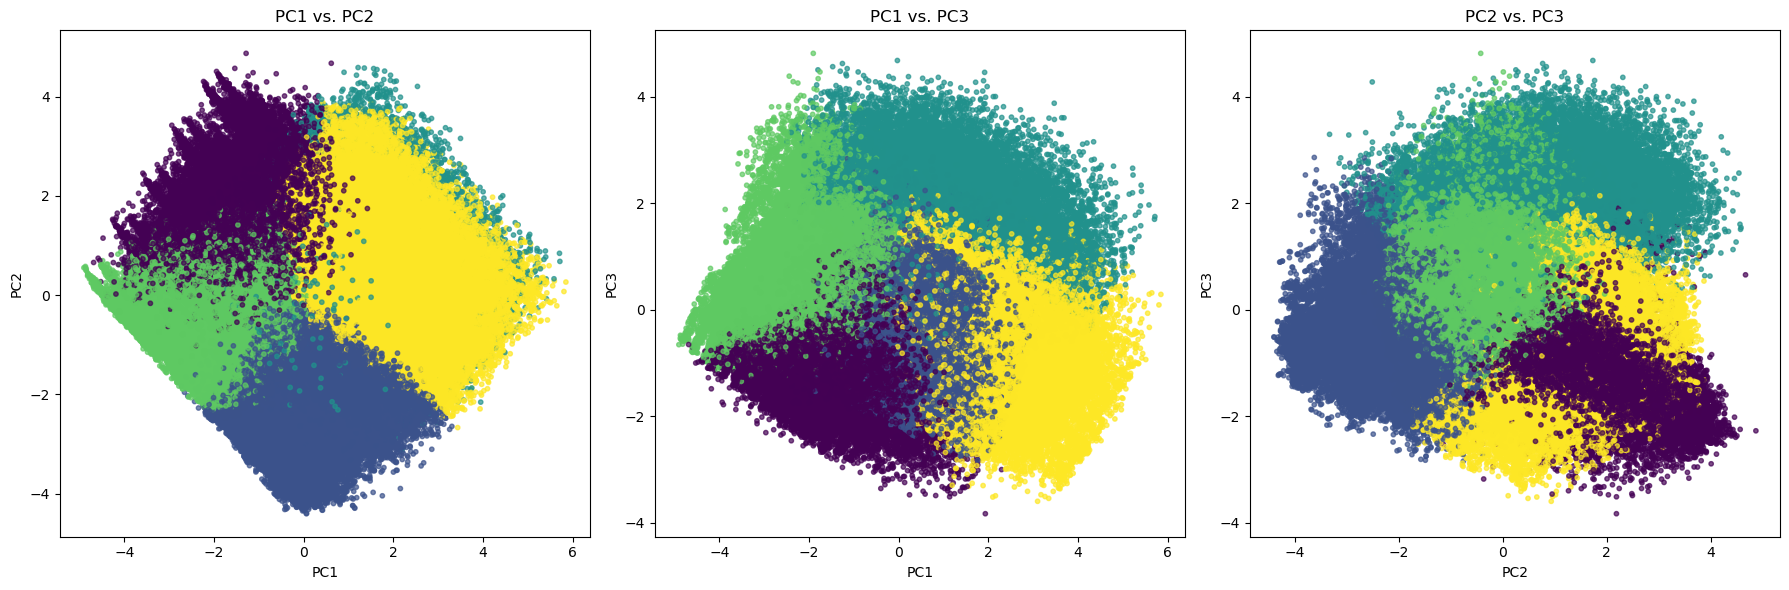

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# PC1 vs. PC2
axes[0].scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', s=10, alpha=0.7)
axes[0].set_title('PC1 vs. PC2')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

# PC1 vs. PC3
axes[1].scatter(reduced_data[:, 0], reduced_data[:, 2], c=kmeans_labels, cmap='viridis', s=10, alpha=0.7)
axes[1].set_title('PC1 vs. PC3')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC3')

# PC2 vs. PC3
axes[2].scatter(reduced_data[:, 1], reduced_data[:, 2], c=kmeans_labels, cmap='viridis', s=10, alpha=0.7)
axes[2].set_title('PC2 vs. PC3')
axes[2].set_xlabel('PC2')
axes[2].set_ylabel('PC3')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply t-SNE on entire data
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_data = tsne.fit_transform(scaled_data)

# Visualize t-SNE results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.title("t-SNE Visualization ( Original Data)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(scatter, label='Cluster ID')
plt.show()

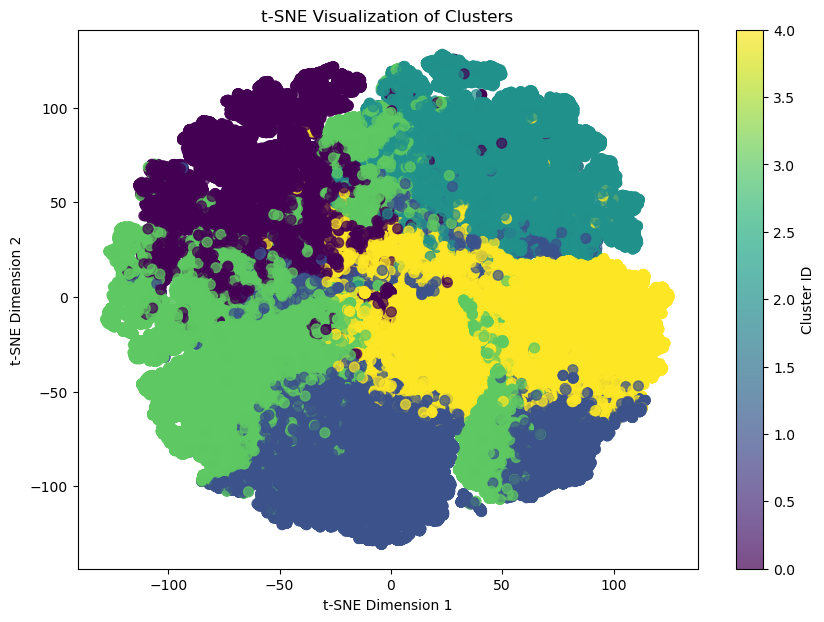

In [72]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(reduced_data)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Cluster ID')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

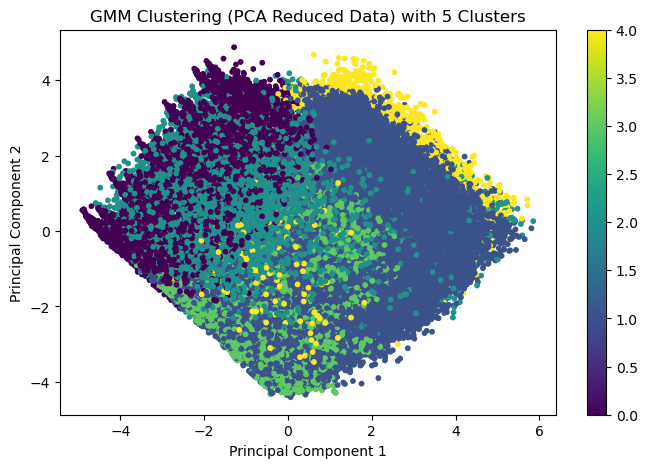

In [74]:
optimal_clusters = 5
# GMM Clustering
def gmm_clustering(data, n_clusters):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    labels = gmm.fit_predict(data)
    return labels

# Perform GMM clustering on PCA reduced data
gmm_labels = gmm_clustering(reduced_data, optimal_clusters)

# Plot GMM clusters after PCA reduction
plt.figure(figsize=(8, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=gmm_labels, cmap='viridis', s=10)
plt.title(f"GMM Clustering (PCA Reduced Data) with {optimal_clusters} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()




Unique cluster labels: [0 1 2 3 4]
Cluster counts:
 1    82713
2    42512
4    38197
0    27729
3    20081
Name: count, dtype: int64


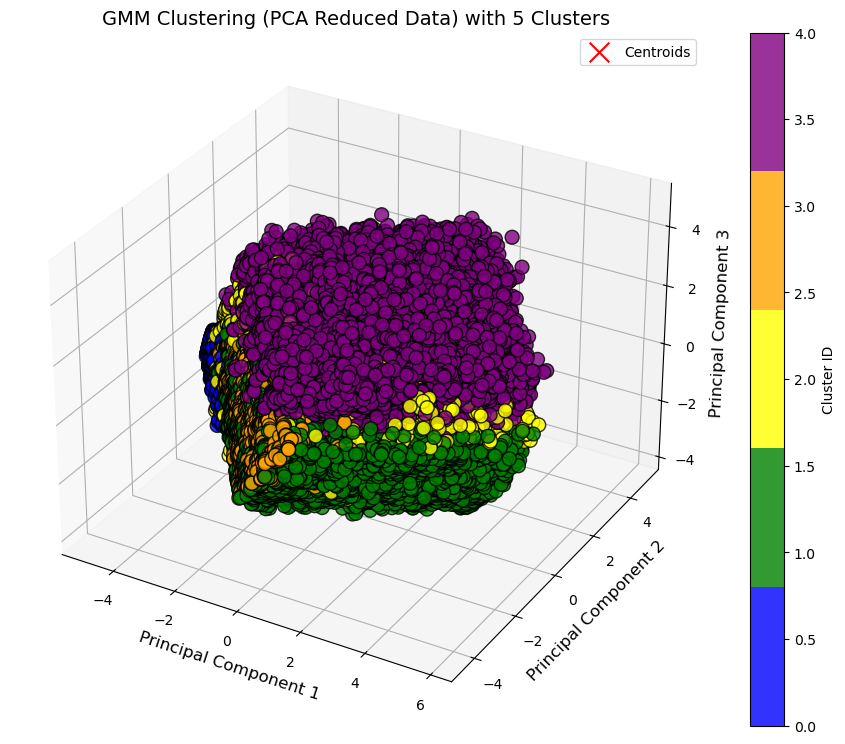

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture  # Import GMM
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Assume 'reduced_data' is PCA-reduced to 3 components
optimal_clusters = 5

# Fit a Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm_labels = gmm.fit_predict(reduced_data)

# Print unique cluster labels and counts
print("Unique cluster labels:", np.unique(gmm_labels))
print("Cluster counts:\n", pd.Series(gmm_labels).value_counts())

# Plot the clusters in 3D with centroids (GMM uses means of Gaussians as centroids)
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Use a custom colormap for better distinction
cmap = ListedColormap(['blue', 'green', 'yellow', 'orange', 'purple'])

# Scatter plot with improved visualization
scatter = ax.scatter(
    reduced_data[:, 0], 
    reduced_data[:, 1], 
    reduced_data[:, 2], 
    c=gmm_labels, 
    cmap=cmap, 
    s=100,  # Increase point size
    alpha=0.8,
    edgecolor='k'  # Add a border for better visibility
)

# Plot the means (centroids) of the Gaussian components
centroids = gmm.means_  # The means of the GMM components
ax.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    centroids[:, 2], 
    c='red', 
    s=200, 
    marker='x', 
    label='Centroids'
)

# Set plot title and labels
ax.set_title(f"GMM Clustering (PCA Reduced Data) with {optimal_clusters} Clusters", fontsize=14)
ax.set_xlabel("Principal Component 1", fontsize=12)
ax.set_ylabel("Principal Component 2", fontsize=12)
ax.set_zlabel("Principal Component 3", fontsize=12)
ax.legend()

# Show color bar
plt.colorbar(scatter, label='Cluster ID')

# Show the plot
plt.show()

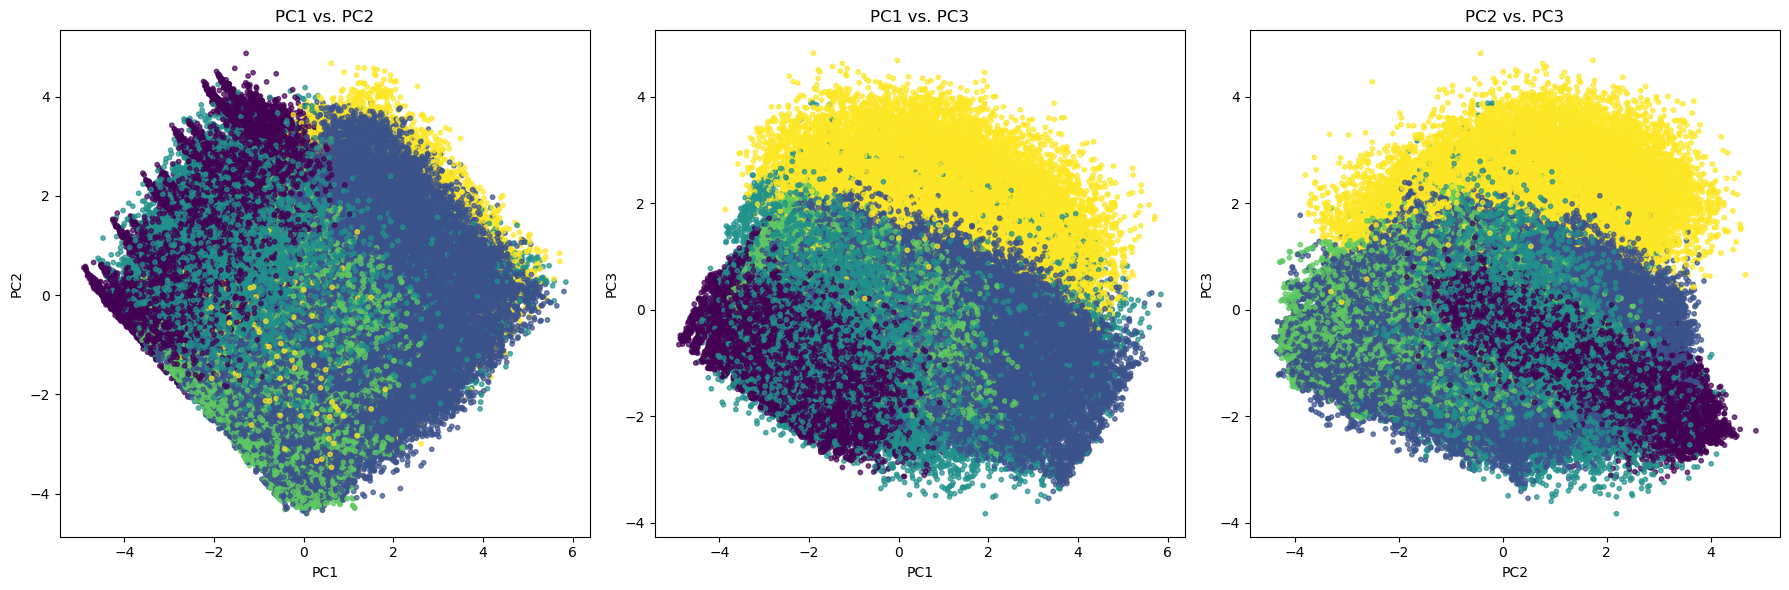

In [80]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# PC1 vs. PC2
axes[0].scatter(reduced_data[:, 0], reduced_data[:, 1], c=gmm_labels, cmap='viridis', s=10, alpha=0.7)
axes[0].set_title('PC1 vs. PC2')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

# PC1 vs. PC3
axes[1].scatter(reduced_data[:, 0], reduced_data[:, 2], c=gmm_labels, cmap='viridis', s=10, alpha=0.7)
axes[1].set_title('PC1 vs. PC3')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC3')

# PC2 vs. PC3
axes[2].scatter(reduced_data[:, 1], reduced_data[:, 2], c=gmm_labels, cmap='viridis', s=10, alpha=0.7)
axes[2].set_title('PC2 vs. PC3')
axes[2].set_xlabel('PC2')
axes[2].set_ylabel('PC3')

plt.tight_layout()
plt.show()

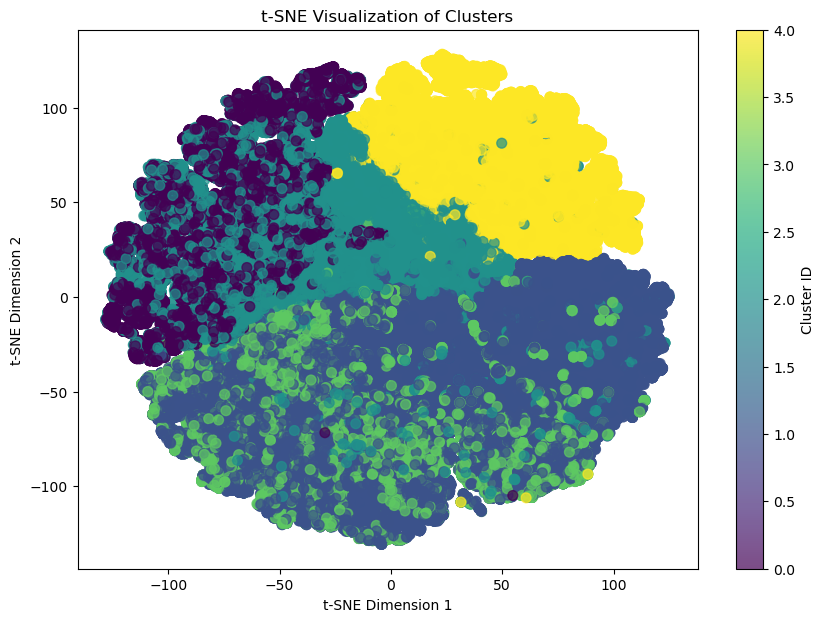

In [86]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(reduced_data)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=gmm_labels, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Cluster ID')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

Subsampling to 500 samples for clustering and dendrogram visualization.


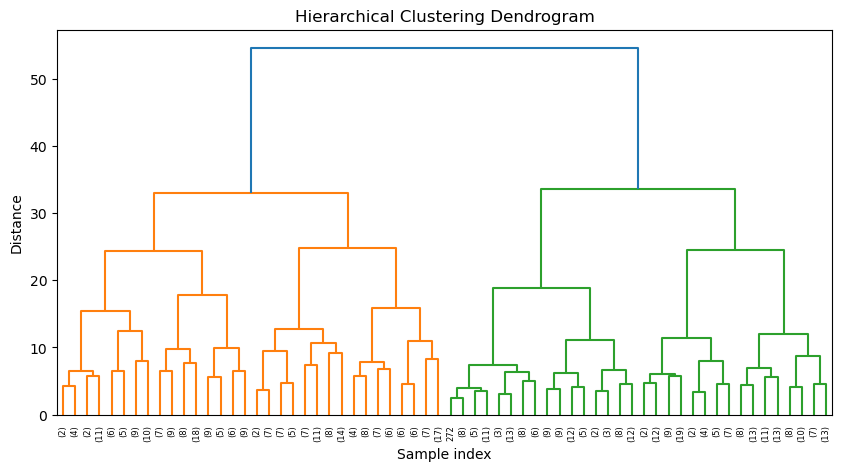

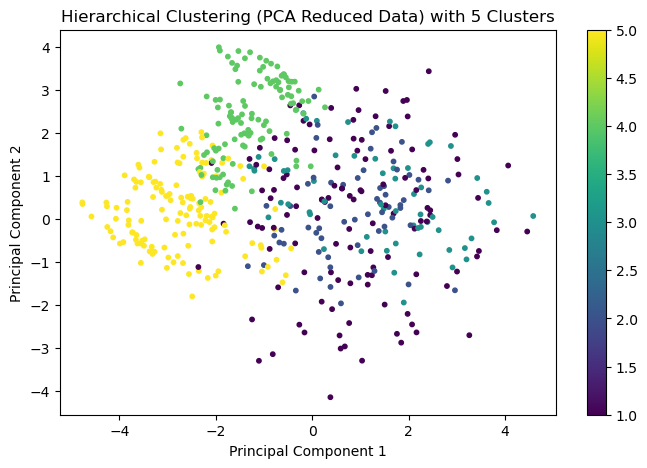

In [8]:
# Hierarchical Clustering
def hierarchical_clustering(data, n_clusters, method='ward', max_samples=500):
    # Subsample if data is too large
    if len(data) > max_samples:
        print(f"Subsampling to {max_samples} samples for clustering and dendrogram visualization.")
        data = data[:max_samples]  # Subsample
    linkage_matrix = linkage(data, method=method)
    labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    
    # Plot dendrogram with truncation
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, truncate_mode='level', p=5)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Sample index")
    plt.ylabel("Distance")
    plt.show()
    
    return labels, data  # Return labels and the subset used for clustering

# Optimal number of clusters
optimal_clusters = 5

# Perform hierarchical clustering on PCA-reduced data
try:
    hier_labels, clustered_data = hierarchical_clustering(reduced_data, optimal_clusters)
    
    # Plot Hierarchical Clustering results after PCA reduction
    plt.figure(figsize=(8, 5))
    plt.scatter(clustered_data[:, 0], clustered_data[:, 1], c=hier_labels, cmap='viridis', s=10)  # Match data
    plt.title(f"Hierarchical Clustering (PCA Reduced Data) with {optimal_clusters} Clusters")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar()
    plt.show()
except MemoryError:
    print("Memory error encountered. Try reducing data size or switching to fastcluster.")

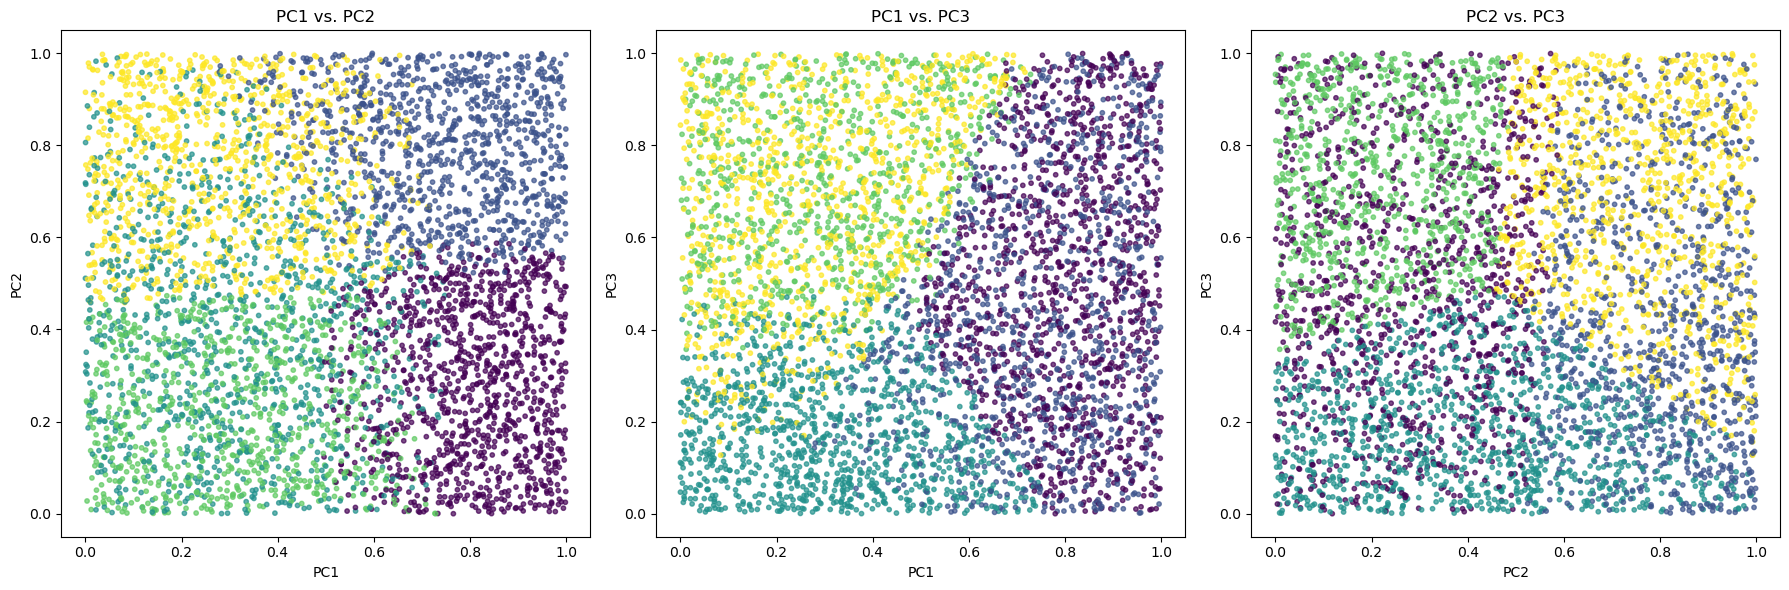

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# PC1 vs. PC2
axes[0].scatter(reduced_data[:, 0], reduced_data[:, 1], c=full_labels, cmap='viridis', s=10, alpha=0.7)
axes[0].set_title('PC1 vs. PC2')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

# PC1 vs. PC3
axes[1].scatter(reduced_data[:, 0], reduced_data[:, 2], c=full_labels, cmap='viridis', s=10, alpha=0.7)
axes[1].set_title('PC1 vs. PC3')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC3')

# PC2 vs. PC3
axes[2].scatter(reduced_data[:, 1], reduced_data[:, 2], c=full_labels, cmap='viridis', s=10, alpha=0.7)
axes[2].set_title('PC2 vs. PC3')
axes[2].set_xlabel('PC2')
axes[2].set_ylabel('PC3')

plt.tight_layout()
plt.show()

Using a subset of 1000 samples for hierarchical clustering.


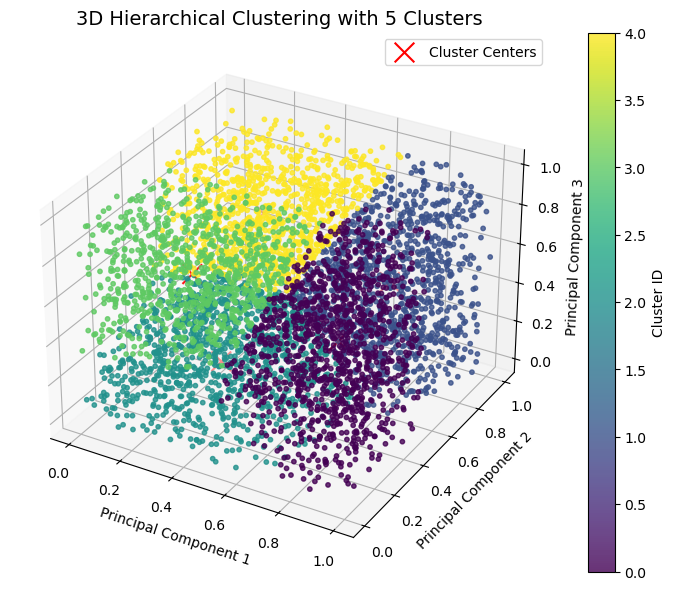

In [16]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def hierarchical_clustering_on_subset(data, n_clusters, subset_size=1000, method='ward'):
    # Subsample the data
    if len(data) > subset_size:
        subset = data[:subset_size]  # Select the first `subset_size` samples
        print(f"Using a subset of {subset_size} samples for hierarchical clustering.")
    else:
        subset = data
        print(f"Using the full dataset ({len(data)} samples) for hierarchical clustering.")
    
    # Perform hierarchical clustering on the subset
    linkage_matrix = linkage(subset, method=method)
    labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    
    # Compute cluster centers for the subset
    cluster_centers = np.array([subset[labels == cluster].mean(axis=0) for cluster in np.unique(labels)])
    
    return labels, cluster_centers, subset

def assign_labels_to_full_data(data, cluster_centers):
    # Assign each point in the full dataset to the nearest cluster center
    full_labels = pairwise_distances_argmin(data, cluster_centers)
    return full_labels

# Parameters
optimal_clusters = 5
subset_size = 1000

# Simulated PCA-reduced data for demonstration
# Replace this with your actual reduced_data
np.random.seed(42)
reduced_data = np.random.rand(5000, 3)  # Example PCA-reduced data with 3 components

# Step 1: Perform hierarchical clustering on a subset
subset_labels, cluster_centers, subset = hierarchical_clustering_on_subset(
    reduced_data, optimal_clusters, subset_size=subset_size
)

# Step 2: Assign labels to the full dataset
full_labels = assign_labels_to_full_data(reduced_data, cluster_centers)

# Step 3: Visualize the results in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    reduced_data[:, 0],
    reduced_data[:, 1],
    reduced_data[:, 2],
    c=full_labels,
    cmap='viridis',
    s=10,
    alpha=0.8
)

# Plot the cluster centers
ax.scatter(
    cluster_centers[:, 0],
    cluster_centers[:, 1],
    cluster_centers[:, 2],
    c='red',
    s=200,
    marker='x',
    label='Cluster Centers'
)

# Set plot labels and title
ax.set_title(f"3D Hierarchical Clustering with {optimal_clusters} Clusters", fontsize=14)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

# Add legend and color bar
ax.legend()
plt.colorbar(scatter, label='Cluster ID')
plt.show()

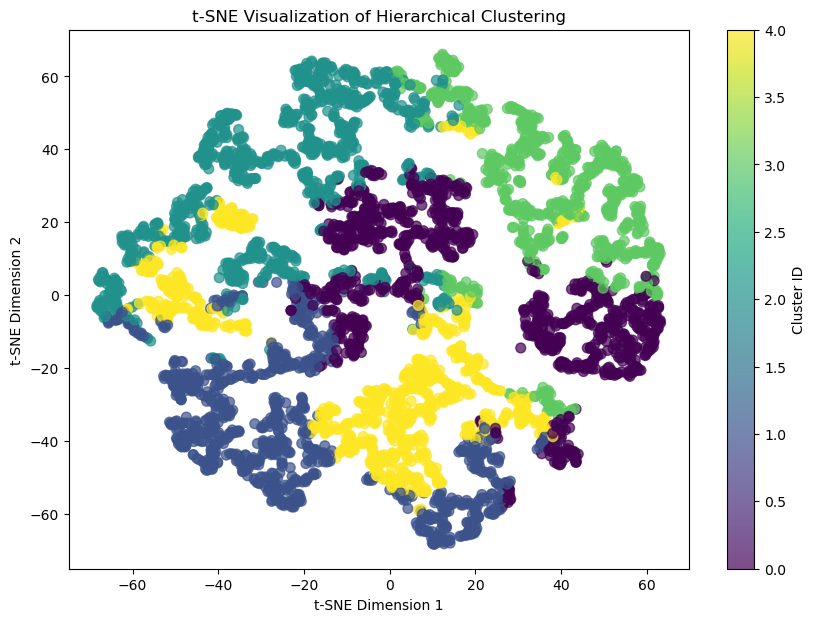

In [22]:
from sklearn.manifold import TSNE

# Perform t-SNE on the reduced data
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(reduced_data)

# Plot the t-SNE visualization
plt.figure(figsize=(10, 7))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=full_labels, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Cluster ID')
plt.title('t-SNE Visualization of Hierarchical Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()